# Get A Room

## Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor

from sklearn import metrics
from sklearn.metrics import r2_score

In [10]:
from sklearn.linear_model import LinearRegression, BayesianRidge, HuberRegressor, Ridge, OrthogonalMatchingPursuit
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

## Loading the data

In [11]:
train0 = pd.read_csv('train.csv')
test0 = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [12]:
train0

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,0x6e26,Single-family home,1120,3.0,2,NaN,0.0,No,All time,5.55,Slightly above average,Medium,80.0,3.56,73.43
39495,0xa013,Apartment,445,1.0,3,Fully Furnished,1.0,No,All time,5.70,Slightly above average,Medium,86.0,2.93,79.91
39496,0x9721,Bungalow,3780,6.0,6,Unfurnished,0.0,Yes,Once in two days,6.84,Well below average,Medium,137.0,3.80,81.44
39497,0x7e25,Single-family home,1266,3.0,1,Semi_Furnished,0.0,No,Once in a day - Morning,4.60,Slightly above average,NaN,88.0,3.25,71.33


In [13]:
test0

,Property_ID,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,0x6e93,Apartment,293,3.0,1,Unfurnished,0.0,No,Once in a day - Morning,7.28,Well above average,Medium,152.0,2.52
1,0x8787,Apartment,586,4.0,1,Semi_Furnished,0.0,No,Once in a day - Evening,7.63,Well below average,Medium,92.0,4.16
2,0x6c17,Container Home,305,1.0,2,Semi_Furnished,1.0,No,All time,5.39,Slightly above average,Medium,90.0,2.92
3,0x9dbd,Apartment,258,2.0,1,Semi_Furnished,1.0,No,All time,7.53,Slightly below average,Medium,158.0,3.45
4,0xbfde,Bungalow,3031,12.0,4,Fully Furnished,0.0,No,All time,8.79,Well above average,High,186.0,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0x423d,Apartment,961,NaN,3,Unfurnished,0.0,No,Once in a day - Evening,5.44,Slightly below average,Medium,94.0,3.55
10496,0x78c5,Container Home,282,1.0,2,Semi_Furnished,3.0,Yes,All time,6.72,Well below average,Medium,106.0,2.90
10497,0xbf3,Duplex,27445,NaN,2,Fully Furnished,0.0,No,Once in a day - Evening,9.28,Well below average,High,149.0,4.02
10498,0x305b,Single-family home,1451,2.0,3,Unfurnished,1.0,Yes,Once in a day - Evening,6.25,Well below average,Medium,131.0,3.49


In [14]:
sample_submission

,Property_ID,Habitability_score
0,0x21e3,71.98
1,0x68d4,71.20
2,0x7d81,71.39
3,0x7a57,31.46
4,0x9409,93.70


In [15]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Property_ID             39499 non-null  object 
 1   Property_Type           39499 non-null  object 
 2   Property_Area           39499 non-null  int64  
 3   Number_of_Windows       37845 non-null  float64
 4   Number_of_Doors         39499 non-null  int64  
 5   Furnishing              38457 non-null  object 
 6   Frequency_of_Powercuts  38116 non-null  float64
 7   Power_Backup            39499 non-null  object 
 8   Water_Supply            39499 non-null  object 
 9   Traffic_Density_Score   39499 non-null  float64
 10  Crime_Rate              38712 non-null  object 
 11  Dust_and_Noise          38280 non-null  object 
 12  Air_Quality_Index       39499 non-null  float64
 13  Neighborhood_Review     39499 non-null  float64
 14  Habitability_score      39499 non-null

In [16]:
train0.isna().sum()

Property_ID                  0
Property_Type                0
Property_Area                0
Number_of_Windows         1654
Number_of_Doors              0
Furnishing                1042
Frequency_of_Powercuts    1383
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 787
Dust_and_Noise            1219
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64

In [17]:
test0.isna().sum()

Property_ID                 0
Property_Type               0
Property_Area               0
Number_of_Windows         445
Number_of_Doors             0
Furnishing                257
Frequency_of_Powercuts    366
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                212
Dust_and_Noise            330
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64

## Cleaning

### Combine both datasets

In [18]:
target = train0['Habitability_score']
test_ids = test0['Property_ID']

train1 = train0.drop(['Property_ID','Habitability_score'],axis=1)
test1 = test0.drop(['Property_ID'],axis=1)

data1 = pd.concat([train1,test1],axis=0).reset_index(drop=True)
data1

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86
1,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55
2,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81
3,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34
4,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Apartment,961,NaN,3,Unfurnished,0.0,No,Once in a day - Evening,5.44,Slightly below average,Medium,94.0,3.55
49995,Container Home,282,1.0,2,Semi_Furnished,3.0,Yes,All time,6.72,Well below average,Medium,106.0,2.90
49996,Duplex,27445,NaN,2,Fully Furnished,0.0,No,Once in a day - Evening,9.28,Well below average,High,149.0,4.02
49997,Single-family home,1451,2.0,3,Unfurnished,1.0,Yes,Once in a day - Evening,6.25,Well below average,Medium,131.0,3.49


In [19]:
data1.isna().sum()

Property_Type                0
Property_Area                0
Number_of_Windows         2099
Number_of_Doors              0
Furnishing                1299
Frequency_of_Powercuts    1749
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 999
Dust_and_Noise            1549
Air_Quality_Index            0
Neighborhood_Review          0
dtype: int64

### Ensure proper Data Types

In [20]:
data1.select_dtypes(np.number)

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
0,106,NaN,1,0.0,5.89,90.0,3.86
1,733,2.0,2,1.0,4.37,96.0,3.55
2,737,4.0,2,0.0,7.45,121.0,3.81
3,900,3.0,2,2.0,6.16,100.0,1.34
4,2238,14.0,6,0.0,5.46,116.0,4.77
...,...,...,...,...,...,...,...
49994,961,NaN,3,0.0,5.44,94.0,3.55
49995,282,1.0,2,3.0,6.72,106.0,2.90
49996,27445,NaN,2,0.0,9.28,149.0,4.02
49997,1451,2.0,3,1.0,6.25,131.0,3.49


In [21]:
data2 = data1.copy()

### Fill categorical Missing Values

In [22]:
# find which columns is object and has Nan
data2.select_dtypes('object').loc[:,data2.isna().sum() > 0]

,Furnishing,Crime_Rate,Dust_and_Noise
0,Semi_Furnished,Slightly below average,Medium
1,Unfurnished,Well below average,Medium
2,Fully Furnished,Slightly below average,Medium
3,Unfurnished,Well above average,Medium
4,Fully Furnished,Well below average,Medium
...,...,...,...
49994,Unfurnished,Slightly below average,Medium
49995,Semi_Furnished,Well below average,Medium
49996,Fully Furnished,Well below average,High
49997,Unfurnished,Well below average,Medium


In [23]:
# impute using a constant value
for column in []:
    data2[column] = data2[column].fillna('None')

# impute using the column mode
for column in [
    'Furnishing',
    'Crime_Rate',
    'Dust_and_Noise'
]:
    data2[column] = data2[column].fillna(data2[column].mode()[0])
    
# replace NOT MENTIONED in Water Supply and Power Backup
for column in [
    'Water_Supply'    
]:
    data2[column] = data2[column].replace('NOT MENTIONED','All time')
    
for column in [
    'Power_Backup'
]:
    data2[column] = data2[column].replace('NOT MENTIONED','No')
    

In [24]:
data3 = data2.copy()

### Numeric missing values

In [25]:
data3.columns[data3.isna().sum() > 0]

Index(['Number_of_Windows', 'Frequency_of_Powercuts'], dtype='object')

In [26]:
# checking the command to use on the function below
data3.loc[data3['Number_of_Windows'].isna() == True, 'Number_of_Windows']

0       NaN
13      NaN
19      NaN
29      NaN
49      NaN
         ..
49968   NaN
49974   NaN
49994   NaN
49996   NaN
49998   NaN
Name: Number_of_Windows, Length: 2099, dtype: float64

In [27]:
def knn_impute(df,na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)    
    non_na_columns = numeric_df.loc[:,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[numeric_df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [28]:
for column in [
    'Number_of_Windows',
    'Frequency_of_Powercuts'
]:
    data3 = knn_impute(data3,column)

In [29]:
data3.isna().sum()

Property_Type             0
Property_Area             0
Number_of_Windows         0
Number_of_Doors           0
Furnishing                0
Frequency_of_Powercuts    0
Power_Backup              0
Water_Supply              0
Traffic_Density_Score     0
Crime_Rate                0
Dust_and_Noise            0
Air_Quality_Index         0
Neighborhood_Review       0
dtype: int64

In [30]:
data4 = data3.copy()

## Feature Transformations

In [31]:
scipy.stats.skew(data4.select_dtypes(np.number))

array([ 7.00345479,  1.81893371,  0.83970073,  1.62233647, -0.56039057,
        8.2869088 , -0.72930676])

In [32]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Property_Area,7.003455,7.003455,True
1,Number_of_Windows,1.818934,1.818934,True
2,Number_of_Doors,0.839701,0.839701,True
3,Frequency_of_Powercuts,1.622336,1.622336,True
4,Traffic_Density_Score,-0.560391,0.560391,True
5,Air_Quality_Index,8.286909,8.286909,True
6,Neighborhood_Review,-0.729307,0.729307,True


In [33]:
skew_df.query('Skewed == True')['Feature']

0             Property_Area
1         Number_of_Windows
2           Number_of_Doors
3    Frequency_of_Powercuts
4     Traffic_Density_Score
5         Air_Quality_Index
6       Neighborhood_Review
Name: Feature, dtype: object

In [34]:
data4[skew_df.query('Skewed == True')['Feature'].values].describe()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,1385.965239,3.915186,2.330367,0.484142,6.356190,121.180364,3.735563
std,1924.828514,2.663821,1.178981,0.741006,1.218949,61.029733,0.796098
min,100.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,496.000000,2.000000,1.000000,0.000000,5.610000,95.000000,3.220000
50%,933.000000,3.400000,2.000000,0.000000,6.470000,113.000000,3.850000
75%,1768.000000,5.000000,3.000000,1.000000,7.220000,140.000000,4.250000
max,28064.000000,15.000000,6.000000,3.000000,9.910000,1044.000000,5.000000


In [35]:
for column in skew_df.query('Skewed == True')['Feature'].values:
    data4[column] = np.log1p(data4[column])

In [36]:
skew_df = pd.DataFrame(data4.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(data4[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,Property_Area,0.088811,0.088811,False
1,Number_of_Windows,-0.070746,0.070746,False
2,Number_of_Doors,0.124731,0.124731,False
3,Frequency_of_Powercuts,0.985282,0.985282,True
4,Traffic_Density_Score,-1.439564,1.439564,True
5,Air_Quality_Index,-2.742745,2.742745,True
6,Neighborhood_Review,-1.354249,1.354249,True


In [37]:
data5 = data4.copy()

In [38]:
data5

,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review
0,Apartment,4.672829,1.098612,0.693147,Semi_Furnished,0.000000,No,Once in a day - Morning,1.930071,Slightly below average,Medium,4.510860,1.581038
1,Apartment,6.598509,1.098612,1.098612,Unfurnished,0.693147,No,Once in a day - Evening,1.680828,Well below average,Medium,4.574711,1.515127
2,Apartment,6.603944,1.609438,1.098612,Fully Furnished,0.000000,No,Once in a day - Morning,2.134166,Slightly below average,Medium,4.804021,1.570697
3,Apartment,6.803505,1.386294,1.098612,Unfurnished,1.098612,Yes,Once in a day - Morning,1.968510,Well above average,Medium,4.615121,0.850151
4,Bungalow,7.713785,2.708050,1.945910,Fully Furnished,0.000000,No,All time,1.865629,Well below average,Medium,4.762174,1.752672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,Apartment,6.869014,1.435085,1.386294,Unfurnished,0.000000,No,Once in a day - Evening,1.862529,Slightly below average,Medium,4.553877,1.515127
49995,Container Home,5.645447,0.693147,1.098612,Semi_Furnished,1.386294,Yes,All time,2.043814,Well below average,Medium,4.672829,1.360977
49996,Duplex,10.219976,1.481605,1.098612,Fully Furnished,0.000000,No,Once in a day - Evening,2.330200,Well below average,High,5.010635,1.613430
49997,Single-family home,7.280697,1.098612,1.386294,Unfurnished,0.693147,Yes,Once in a day - Evening,1.981001,Well below average,Medium,4.882802,1.501853


## Encoding categoricals

In [39]:
pd.get_dummies(data5)

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,...,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly above average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_High,Dust_and_Noise_Low,Dust_and_Noise_Medium
0,4.672829,1.098612,0.693147,0.000000,1.930071,4.510860,1.581038,0,1,0,...,0,1,0,0,1,0,0,0,0,1
1,6.598509,1.098612,1.098612,0.693147,1.680828,4.574711,1.515127,0,1,0,...,1,0,0,0,0,0,1,0,0,1
2,6.603944,1.609438,1.098612,0.000000,2.134166,4.804021,1.570697,0,1,0,...,0,1,0,0,1,0,0,0,0,1
3,6.803505,1.386294,1.098612,1.098612,1.968510,4.615121,0.850151,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,7.713785,2.708050,1.945910,0.000000,1.865629,4.762174,1.752672,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,6.869014,1.435085,1.386294,0.000000,1.862529,4.553877,1.515127,0,1,0,...,1,0,0,0,1,0,0,0,0,1
49995,5.645447,0.693147,1.098612,1.386294,2.043814,4.672829,1.360977,0,0,0,...,0,0,0,0,0,0,1,0,0,1
49996,10.219976,1.481605,1.098612,0.000000,2.330200,5.010635,1.613430,0,0,0,...,1,0,0,0,0,0,1,1,0,0
49997,7.280697,1.098612,1.386294,0.693147,1.981001,4.882802,1.501853,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [40]:
data5 = pd.get_dummies(data5)

In [41]:
data6 = data5.copy()

## Scaling

In [42]:
scaler = StandardScaler()
scaler.fit(data6)

data6 = pd.DataFrame(scaler.transform(data6), index=data6.index, columns=data6.columns)

In [43]:
data6

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,...,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly above average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_High,Dust_and_Noise_Low,Dust_and_Noise_Medium
0,-2.470927,-0.735827,-1.302786,-0.719597,-0.271483,-0.561153,0.224811,-0.114678,1.307715,-0.345902,...,-0.497912,1.732582,-0.225772,-0.394181,1.556206,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
1,-0.262887,-0.735827,-0.128752,0.953209,-1.627858,-0.401025,-0.126574,-0.114678,1.307715,-0.345902,...,2.008389,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923
2,-0.256656,0.284507,-0.128752,-0.719597,0.839199,0.174044,0.169680,-0.114678,1.307715,-0.345902,...,-0.497912,1.732582,-0.225772,-0.394181,1.556206,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
3,-0.027833,-0.161204,-0.128752,1.931737,-0.062299,-0.299685,-3.671686,-0.114678,1.307715,-0.345902,...,-0.497912,1.732582,-0.225772,-0.394181,-0.642589,3.955968,-1.026779,-0.295448,-0.234873,0.390923
4,1.015920,2.478899,2.324618,-0.719597,-0.622173,0.069099,1.139822,-0.114678,-0.764692,2.890995,...,-0.497912,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,0.047282,-0.063750,0.704238,-0.719597,-0.639048,-0.453273,-0.126574,-0.114678,1.307715,-0.345902,...,2.008389,-0.577173,-0.225772,-0.394181,1.556206,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
49995,-1.355696,-1.545712,-0.128752,2.626014,0.347506,-0.154963,-0.948379,-0.114678,-0.764692,-0.345902,...,-0.497912,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923
49996,3.889590,0.029170,-0.128752,-0.719597,1.906011,0.692195,0.397496,-0.114678,-0.764692,-0.345902,...,2.008389,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,3.384694,-0.234873,-2.558047
49997,0.519329,-0.735827,0.704238,0.953209,0.005679,0.371612,-0.197343,-0.114678,-0.764692,-0.345902,...,2.008389,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923


## Target transformation

C:\Users\leedw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\leedw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\leedw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

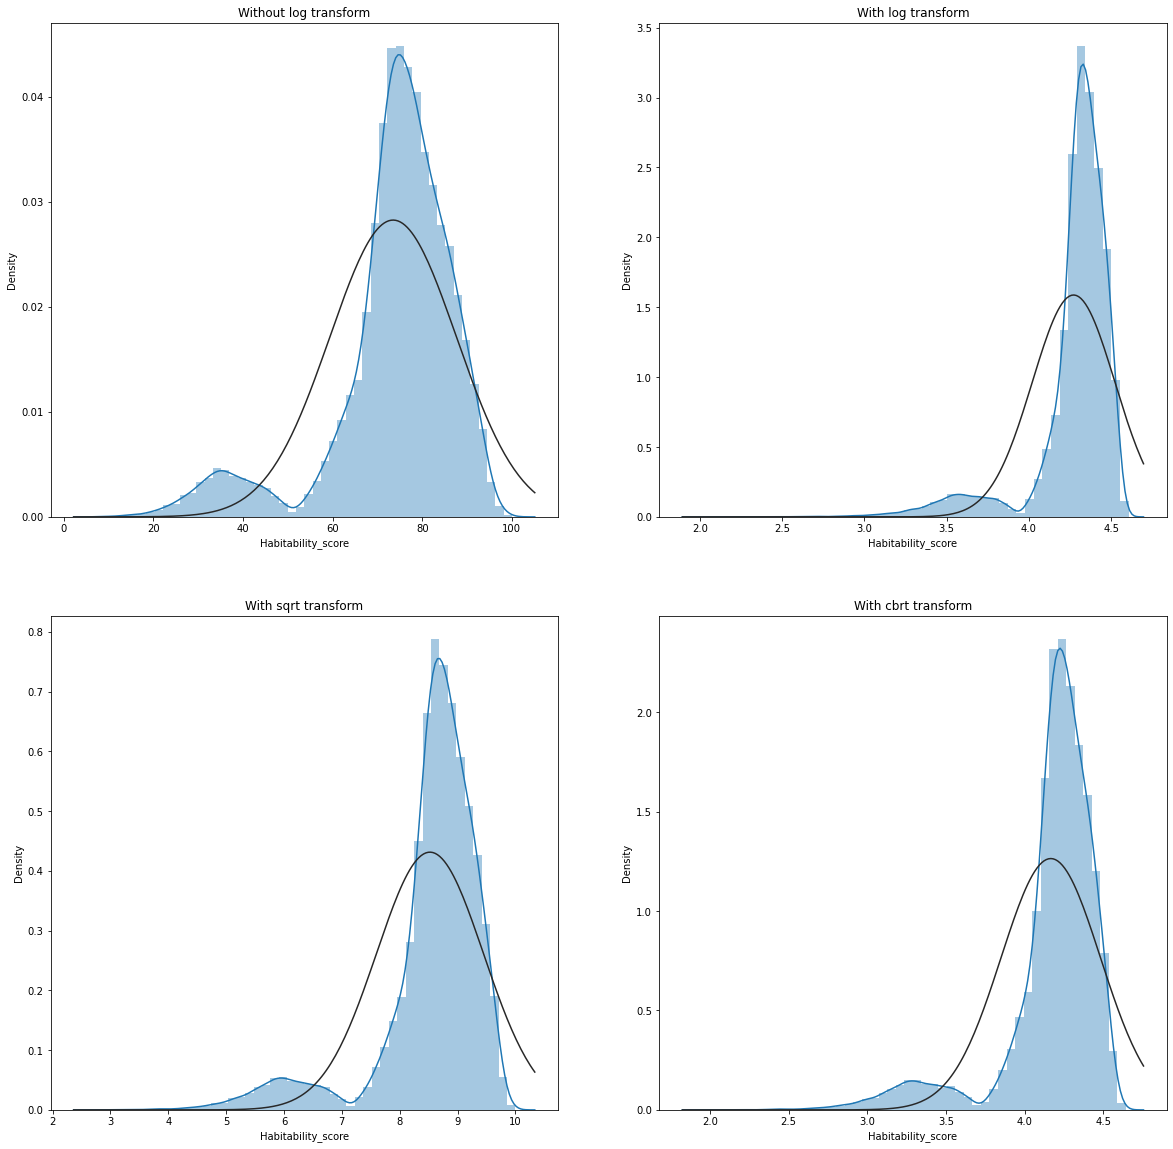

In [44]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.distplot(target, kde=True, fit=scipy.stats.norm)
plt.title('Without log transform')

plt.subplot(2,2,2)
sns.distplot(np.log(target), kde=True, fit=scipy.stats.norm)
plt.title('With log transform')

plt.subplot(2,2,3)
sns.distplot(np.sqrt(target), kde=True, fit=scipy.stats.norm)
plt.title('With sqrt transform')

plt.subplot(2,2,4)
sns.distplot(np.cbrt(target), kde=True, fit=scipy.stats.norm)
plt.title('With cbrt transform')

plt.show()

In [45]:
data7 = data6.copy()

In [46]:
log_target = np.log(target)

## Split Data

In [47]:
train_final = data7.loc[:train0.index.max(),:].copy()
test_final = data7.loc[train0.index.max()+1:,:].reset_index(drop=True).copy()

In [48]:
train_final

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,...,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly above average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_High,Dust_and_Noise_Low,Dust_and_Noise_Medium
0,-2.470927,-0.735827,-1.302786,-0.719597,-0.271483,-0.561153,0.224811,-0.114678,1.307715,-0.345902,...,-0.497912,1.732582,-0.225772,-0.394181,1.556206,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
1,-0.262887,-0.735827,-0.128752,0.953209,-1.627858,-0.401025,-0.126574,-0.114678,1.307715,-0.345902,...,2.008389,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923
2,-0.256656,0.284507,-0.128752,-0.719597,0.839199,0.174044,0.169680,-0.114678,1.307715,-0.345902,...,-0.497912,1.732582,-0.225772,-0.394181,1.556206,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
3,-0.027833,-0.161204,-0.128752,1.931737,-0.062299,-0.299685,-3.671686,-0.114678,1.307715,-0.345902,...,-0.497912,1.732582,-0.225772,-0.394181,-0.642589,3.955968,-1.026779,-0.295448,-0.234873,0.390923
4,1.015920,2.478899,2.324618,-0.719597,-0.622173,0.069099,1.139822,-0.114678,-0.764692,2.890995,...,-0.497912,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,0.222673,-0.161204,-0.128752,-0.719597,-0.546879,-0.853089,-0.114870,-0.114678,-0.764692,-0.345902,...,-0.497912,-0.577173,-0.225772,2.536908,-0.642589,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
39495,-0.834126,-1.545712,0.704238,0.953209,-0.423660,-0.673883,-0.907527,-0.114678,1.307715,-0.345902,...,-0.497912,-0.577173,-0.225772,2.536908,-0.642589,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
39496,1.616706,0.956584,2.324618,-0.719597,0.431445,0.483089,0.158585,-0.114678,-0.764692,2.890995,...,-0.497912,-0.577173,4.429237,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923
39497,0.363055,-0.161204,-1.302786,-0.719597,-1.399629,-0.616885,-0.490204,-0.114678,-0.764692,-0.345902,...,-0.497912,1.732582,-0.225772,2.536908,-0.642589,-0.252783,-1.026779,-0.295448,-0.234873,0.390923


In [49]:
test_final

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,...,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days,Crime_Rate_Slightly above average,Crime_Rate_Slightly below average,Crime_Rate_Well above average,Crime_Rate_Well below average,Dust_and_Noise_High,Dust_and_Noise_Low,Dust_and_Noise_Medium
0,-1.311971,-0.161204,-1.302786,-0.719597,0.728600,0.741857,-1.494909,-0.114678,1.307715,-0.345902,...,-0.497912,1.732582,-0.225772,-0.394181,-0.642589,3.955968,-1.026779,-0.295448,-0.234873,0.390923
1,-0.519141,0.284507,-1.302786,-0.719597,0.953906,-0.506633,0.544139,-0.114678,1.307715,-0.345902,...,2.008389,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923
2,-1.266100,-1.545712,-0.128752,0.953209,-0.681464,-0.561153,-0.921110,-0.114678,-0.764692,-0.345902,...,-0.497912,-0.577173,-0.225772,2.536908,-0.642589,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
3,-1.457308,-0.735827,-1.302786,0.953209,0.890479,0.838324,-0.245049,-0.114678,1.307715,-0.345902,...,-0.497912,-0.577173,-0.225772,-0.394181,1.556206,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
4,1.363570,2.193066,1.350355,-0.719597,1.640231,1.245103,-1.200293,-0.114678,-0.764692,2.890995,...,-0.497912,-0.577173,-0.225772,-0.394181,-0.642589,3.955968,-1.026779,3.384694,-0.234873,-2.558047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10495,0.047282,-0.063750,0.704238,-0.719597,-0.639048,-0.453273,-0.126574,-0.114678,1.307715,-0.345902,...,2.008389,-0.577173,-0.225772,-0.394181,1.556206,-0.252783,-1.026779,-0.295448,-0.234873,0.390923
10496,-1.355696,-1.545712,-0.128752,2.626014,0.347506,-0.154963,-0.948379,-0.114678,-0.764692,-0.345902,...,-0.497912,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923
10497,3.889590,0.029170,-0.128752,-0.719597,1.906011,0.692195,0.397496,-0.114678,-0.764692,-0.345902,...,2.008389,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,3.384694,-0.234873,-2.558047
10498,0.519329,-0.735827,0.704238,0.953209,0.005679,0.371612,-0.197343,-0.114678,-0.764692,-0.345902,...,2.008389,-0.577173,-0.225772,-0.394181,-0.642589,-0.252783,0.973919,-0.295448,-0.234873,0.390923


# Model Testing

In [50]:
y = log_target

In [51]:
X = train_final

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

## Hyperparameter Tuning - Random Forest

In [52]:
randomForest_Tuning = RandomForestRegressor()

In [70]:
n_estimators = [5,20,50,100]
max_features = ['sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [54]:
rf_random = RandomizedSearchCV(estimator = randomForest_Tuning,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [55]:
rf_random.fit(train_final, log_target)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\leedw\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [56]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}  



## Hyperparameter Tuning - Catboost

In [53]:
 catTun = CatBoostRegressor()

In [93]:
max_depth_Cat = [4,6,8,10]
eta_Cat = [0.1,0.3,0.5]
n_estimators_Cat = [50,100,150,200]
verbose_Cat = [0]



paramsCat = {
    'max_depth': max_depth_Cat,
    'n_estimators': n_estimators_Cat,
    'eta': eta_Cat,
    'verbose':verbose_Cat
#     'subsample': 1,
#     'colsample_bytree': 1,
}

In [94]:
Cat_random = RandomizedSearchCV(estimator = catTun, param_distributions = paramsCat,
               n_iter = 100, cv = 5, verbose=0, random_state=35, n_jobs = -1)

In [95]:
Cat_random.fit(train_final, log_target)

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostRegressor object at 0x0000023A1519BD00>,
                   n_iter=100, n_jobs=-1,
                   param_distributions={'eta': [0.1, 0.3, 0.5],
                                        'max_depth': [4, 6, 8, 10],
                                        'n_estimators': [50, 100, 150, 200],
                                        'verbose': [0]},
                   random_state=35)

In [96]:
print ('Best Parameters: ', Cat_random.best_params_, ' \n')

Best Parameters:  {'verbose': 0, 'n_estimators': 200, 'max_depth': 10, 'eta': 0.1}  



In [72]:
models = {
    'linreg': LinearRegression(),
    'catboost': CatBoostRegressor(verbose=0),
    'catboostT': CatBoostRegressor(verbose=0,
                                   n_estimators= 200,
                                   max_depth= 10,
                                   eta= 0.1),
    'randomForest': RandomForestRegressor(),
    'randomForestT': RandomForestRegressor(n_estimators = 100, 
                                          min_samples_split = 10, 
                                          min_samples_leaf= 1, 
                                          max_features = 'sqrt', 
                                          max_depth= 110, 
                                          bootstrap=True),
    'bayesianridge': BayesianRidge(),
    'huberregressor': HuberRegressor(),
    'ridge': Ridge(),
    'OMP': OrthogonalMatchingPursuit(normalize=False),
    'LGBM': LGBMRegressor(),
    'GBR': GradientBoostingRegressor(),
    'XGBR': XGBRegressor()    
}

In [73]:
for name, model in models.items():
    model.fit(train_final, log_target)
    print(name + 'trained')

linregtrained
catboosttrained
catboostTtrained
randomForesttrained
randomForestTtrained
bayesianridgetrained
huberregressortrained
ridgetrained
OMPtrained
LGBMtrained
GBRtrained
XGBRtrained


In [69]:
results = {}

In [70]:
kf = KFold(n_splits=5)

In [71]:
for name, model in models.items():
    result = cross_val_score(model, train_final, log_target, scoring='r2', cv=kf)
    results[name] = result

0:	learn: 0.2336394	total: 16ms	remaining: 3.18s
1:	learn: 0.2174643	total: 32.2ms	remaining: 3.19s
2:	learn: 0.2028895	total: 49.2ms	remaining: 3.23s
3:	learn: 0.1901134	total: 66.1ms	remaining: 3.24s
4:	learn: 0.1786543	total: 82.6ms	remaining: 3.22s
5:	learn: 0.1691591	total: 99.5ms	remaining: 3.22s
6:	learn: 0.1600617	total: 115ms	remaining: 3.18s
7:	learn: 0.1522839	total: 130ms	remaining: 3.13s
8:	learn: 0.1453709	total: 145ms	remaining: 3.07s
9:	learn: 0.1393159	total: 159ms	remaining: 3.02s
10:	learn: 0.1340856	total: 173ms	remaining: 2.97s
11:	learn: 0.1291651	total: 187ms	remaining: 2.93s
12:	learn: 0.1248576	total: 201ms	remaining: 2.9s
13:	learn: 0.1214976	total: 217ms	remaining: 2.88s
14:	learn: 0.1184949	total: 232ms	remaining: 2.86s
15:	learn: 0.1157835	total: 246ms	remaining: 2.83s
16:	learn: 0.1133298	total: 261ms	remaining: 2.81s
17:	learn: 0.1111619	total: 276ms	remaining: 2.79s
18:	learn: 0.1094414	total: 291ms	remaining: 2.77s
19:	learn: 0.1077418	total: 305ms	rema

173:	learn: 0.0807380	total: 2.6s	remaining: 389ms
174:	learn: 0.0806881	total: 2.61s	remaining: 374ms
175:	learn: 0.0806197	total: 2.63s	remaining: 359ms
176:	learn: 0.0805501	total: 2.64s	remaining: 344ms
177:	learn: 0.0804735	total: 2.66s	remaining: 329ms
178:	learn: 0.0804438	total: 2.67s	remaining: 314ms
179:	learn: 0.0803927	total: 2.69s	remaining: 299ms
180:	learn: 0.0803203	total: 2.7s	remaining: 284ms
181:	learn: 0.0802606	total: 2.72s	remaining: 269ms
182:	learn: 0.0801823	total: 2.73s	remaining: 254ms
183:	learn: 0.0801294	total: 2.75s	remaining: 239ms
184:	learn: 0.0800468	total: 2.76s	remaining: 224ms
185:	learn: 0.0799964	total: 2.78s	remaining: 209ms
186:	learn: 0.0799210	total: 2.79s	remaining: 194ms
187:	learn: 0.0798698	total: 2.81s	remaining: 179ms
188:	learn: 0.0797726	total: 2.82s	remaining: 164ms
189:	learn: 0.0797247	total: 2.83s	remaining: 149ms
190:	learn: 0.0796506	total: 2.85s	remaining: 134ms
191:	learn: 0.0795843	total: 2.86s	remaining: 119ms
192:	learn: 0.

135:	learn: 0.0839532	total: 2.03s	remaining: 957ms
136:	learn: 0.0838226	total: 2.05s	remaining: 942ms
137:	learn: 0.0837748	total: 2.06s	remaining: 928ms
138:	learn: 0.0836942	total: 2.08s	remaining: 913ms
139:	learn: 0.0836427	total: 2.1s	remaining: 899ms
140:	learn: 0.0835677	total: 2.11s	remaining: 884ms
141:	learn: 0.0835021	total: 2.13s	remaining: 869ms
142:	learn: 0.0834094	total: 2.14s	remaining: 855ms
143:	learn: 0.0833470	total: 2.16s	remaining: 840ms
144:	learn: 0.0832604	total: 2.17s	remaining: 825ms
145:	learn: 0.0832041	total: 2.19s	remaining: 810ms
146:	learn: 0.0830559	total: 2.21s	remaining: 795ms
147:	learn: 0.0829559	total: 2.22s	remaining: 781ms
148:	learn: 0.0828652	total: 2.24s	remaining: 766ms
149:	learn: 0.0827988	total: 2.25s	remaining: 751ms
150:	learn: 0.0827517	total: 2.27s	remaining: 736ms
151:	learn: 0.0825853	total: 2.28s	remaining: 721ms
152:	learn: 0.0825114	total: 2.3s	remaining: 706ms
153:	learn: 0.0824140	total: 2.31s	remaining: 690ms
154:	learn: 0.

107:	learn: 0.0864177	total: 1.63s	remaining: 1.39s
108:	learn: 0.0863286	total: 1.64s	remaining: 1.37s
109:	learn: 0.0862118	total: 1.66s	remaining: 1.36s
110:	learn: 0.0861183	total: 1.67s	remaining: 1.34s
111:	learn: 0.0860340	total: 1.69s	remaining: 1.33s
112:	learn: 0.0859093	total: 1.7s	remaining: 1.31s
113:	learn: 0.0858480	total: 1.72s	remaining: 1.29s
114:	learn: 0.0857699	total: 1.73s	remaining: 1.28s
115:	learn: 0.0856910	total: 1.75s	remaining: 1.26s
116:	learn: 0.0855788	total: 1.76s	remaining: 1.25s
117:	learn: 0.0854722	total: 1.78s	remaining: 1.24s
118:	learn: 0.0854189	total: 1.79s	remaining: 1.22s
119:	learn: 0.0853598	total: 1.81s	remaining: 1.21s
120:	learn: 0.0852410	total: 1.83s	remaining: 1.19s
121:	learn: 0.0850977	total: 1.85s	remaining: 1.18s
122:	learn: 0.0849794	total: 1.86s	remaining: 1.17s
123:	learn: 0.0848512	total: 1.88s	remaining: 1.15s
124:	learn: 0.0848037	total: 1.9s	remaining: 1.14s
125:	learn: 0.0847294	total: 1.91s	remaining: 1.12s
126:	learn: 0.

69:	learn: 0.0907550	total: 1.1s	remaining: 2.05s
70:	learn: 0.0906188	total: 1.12s	remaining: 2.04s
71:	learn: 0.0905319	total: 1.14s	remaining: 2.02s
72:	learn: 0.0904564	total: 1.15s	remaining: 2s
73:	learn: 0.0903272	total: 1.17s	remaining: 1.98s
74:	learn: 0.0902592	total: 1.18s	remaining: 1.97s
75:	learn: 0.0901315	total: 1.2s	remaining: 1.95s
76:	learn: 0.0900719	total: 1.21s	remaining: 1.94s
77:	learn: 0.0898408	total: 1.23s	remaining: 1.92s
78:	learn: 0.0897563	total: 1.24s	remaining: 1.91s
79:	learn: 0.0896709	total: 1.26s	remaining: 1.89s
80:	learn: 0.0896266	total: 1.27s	remaining: 1.87s
81:	learn: 0.0895349	total: 1.29s	remaining: 1.86s
82:	learn: 0.0894347	total: 1.31s	remaining: 1.84s
83:	learn: 0.0893070	total: 1.32s	remaining: 1.82s
84:	learn: 0.0892168	total: 1.34s	remaining: 1.81s
85:	learn: 0.0891279	total: 1.35s	remaining: 1.79s
86:	learn: 0.0889473	total: 1.37s	remaining: 1.77s
87:	learn: 0.0888607	total: 1.38s	remaining: 1.76s
88:	learn: 0.0887822	total: 1.4s	rem

32:	learn: 0.0975279	total: 524ms	remaining: 2.65s
33:	learn: 0.0972082	total: 542ms	remaining: 2.64s
34:	learn: 0.0968859	total: 559ms	remaining: 2.63s
35:	learn: 0.0965625	total: 576ms	remaining: 2.62s
36:	learn: 0.0962450	total: 592ms	remaining: 2.61s
37:	learn: 0.0960673	total: 608ms	remaining: 2.59s
38:	learn: 0.0957622	total: 623ms	remaining: 2.57s
39:	learn: 0.0955222	total: 637ms	remaining: 2.55s
40:	learn: 0.0953247	total: 652ms	remaining: 2.53s
41:	learn: 0.0950707	total: 666ms	remaining: 2.51s
42:	learn: 0.0948472	total: 682ms	remaining: 2.49s
43:	learn: 0.0946134	total: 697ms	remaining: 2.47s
44:	learn: 0.0944465	total: 713ms	remaining: 2.46s
45:	learn: 0.0942389	total: 728ms	remaining: 2.44s
46:	learn: 0.0941048	total: 743ms	remaining: 2.42s
47:	learn: 0.0939224	total: 758ms	remaining: 2.4s
48:	learn: 0.0936841	total: 773ms	remaining: 2.38s
49:	learn: 0.0935866	total: 788ms	remaining: 2.36s
50:	learn: 0.0934788	total: 803ms	remaining: 2.35s
51:	learn: 0.0933421	total: 818m

199:	learn: 0.0794217	total: 3.12s	remaining: 0us


In [74]:
results

{'linreg': array([0.58158887, 0.58921842, 0.58258658, 0.60191553, 0.57769176]),
 'catboost': array([0.84604603, 0.85125721, 0.84548924, 0.85980252, 0.84585263]),
 'catboostT': array([0.85247404, 0.855316  , 0.84928089, 0.86603072, 0.85279182]),
 'randomForest': array([0.85252207, 0.8519442 , 0.84669665, 0.86503325, 0.85088791]),
 'randomForestT': array([0.8480284 , 0.84902301, 0.84353079, 0.85945887, 0.84954023]),
 'bayesianridge': array([0.58155862, 0.58916674, 0.58259479, 0.60185106, 0.57775935]),
 'huberregressor': array([0.52438305, 0.52647012, 0.52534107, 0.52780837, 0.52569858]),
 'ridge': array([0.58157278, 0.58922044, 0.58258748, 0.60185722, 0.5776972 ]),
 'OMP': array([0.46864684, 0.47396489, 0.46580491, 0.48221652, 0.45733732]),
 'LGBM': array([0.73343693, 0.72930025, 0.72086938, 0.75132215, 0.72330019]),
 'GBR': array([0.79560125, 0.8004835 , 0.79458645, 0.81297417, 0.79812877]),
 'XGBR': array([0.84142279, 0.84332468, 0.83338004, 0.8521729 , 0.83745135])}

In [75]:
for name, result in results.items():
    print('\n-----\n'+name)
    print(np.mean(result))
    print(np.std(result))


-----
linreg
0.5866002331416391
0.008508787863989743

-----
catboost
0.8496895252042848
0.005483969930677155

-----
catboostT
0.8551786960260574
0.005754681124811037

-----
randomForest
0.8534168183905846
0.006155757462494048

-----
randomForestT
0.8499162587186347
0.005221858105963673

-----
bayesianridge
0.5865861131980179
0.00847108285314493

-----
huberregressor
0.525940240895845
0.0011500376532536248

-----
ridge
0.5865870236427874
0.00848860026310291

-----
OMP
0.4695940951186014
0.008293528241755747

-----
LGBM
0.7316457790546843
0.01078562791553953

-----
GBR
0.8003548284250266
0.0066346121743426365

-----
XGBR
0.8415503533240523
0.006317576381758787


## Combine Predictions

In [80]:
final_predictions = (
# # #     0.2 * np.exp(models['catboost'].predict(test_final)) +
    0.5 * np.exp(models['catboostT'].predict(test_final)) +
# #     0.2 * np.exp(models['XGBR'].predict(test_final)) +
    0.5 * np.exp(models['randomForest'].predict(test_final)) 
#     0.2 * np.exp(models['randomForestT'].predict(test_final))
)

In [81]:
final_predictions

array([29.64672336, 79.88133726, 65.51539852, ..., 74.47157715,
       79.67895856, 80.28643773])

# Exporting Solutions

In [82]:
# add the file name as string with .csv
def exportSolution(predict,filename):
    new_data_predictions = pd.DataFrame(predict, columns=['Habitability_score'])
    solution = pd.concat([test0['Property_ID'],new_data_predictions],axis=1)
    solution.to_csv(filename,index=False)
    return

In [83]:
exportSolution(final_predictions,'results_005.csv')